<h1><center>Zoologie - Age Opossum</center></h1>

<center><img src="https://simplonline.co/_next/image?url=https%3A%2F%2Fsimplonline-v3-prod.s3.eu-west-3.amazonaws.com%2Fmedia%2Fimage%2Fjpg%2F9a28a1bd-a3fd-4d3b-ba0e-90a96d44ceb0.jpg&w=1280&q=75" alt="Opossum" title="Opossum"  style="object-fit:cover; width:800px; height:250px;"/></center>

> __*Created by Charley lebarbier*__

## Objectives :  
*Un groupe de zoologistes vous fournit une dataset regroupant les caractéristiques d'opossums qu'ils ont étudiés et vous* *demande un programme capable de prédire l'âge d'un opossum à partir de ses caractéristiques.*

https://fr.wikipedia.org/wiki/Opossum

## Others :

- Les données ont été analysées et il existe une trace de cette analyse exploratoire dans un jupyter-notebook  
- Le score obtenu (RMSE, R-Squared)  
- Un programme qui fonctionne sans bug, et qui prédit au mieux la taille d'un opossum à partir de ces caractéristiques

____________________________________
____________________________________

<center><h2>EDA - Exploratory Data Analysis</h2></center>

#### Working Environnement Preparation

In [30]:
# Import Libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from math import sqrt
from numpy import mean
from sklearn import linear_model
from sklearn import neighbors
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [5]:
# Import dataset in a variable
#
dataset = pd.read_csv('opossum.csv')

# Check the import
print(dataset.head())
print(dataset.tail())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4

#### Get informations about our dataset

In [3]:
# Get information and description about our dataset

print(dataset.info(), '\n')           # give infos about the types of each cols
print(dataset.describe())       # give infos about the stats of our datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB
None 

             case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833

In [ ]:
# Check if missing value

# dataset.isnull().values.any()   # True / False : give a fast answer
dataset.isnull().sum()       # Low -> cause calcul each value, give where data is missing

In [ ]:
# Display the amount of missing values to decide the strategy to adopt : drop or replace

sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis');
plt.show()

#### Data Cleaning

In [6]:
# First Strategy : Drop NaN
# dataset.dropna()

# Second Strategy : Replace NaN - SimpleImputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='median')      # mean; median; most frequent ; renvoie un np.array
dataset[['age','footlgth']] = pd.DataFrame(imputer.fit_transform(dataset[['age','footlgth']]))

In [ ]:
# Check the modification and / or display it
#
dataset.isnull().sum()

#### EDA : Asking Analytical Questions and Visualizations
*NB: each graph need an explanation, create a markdown '__Conclusion :__' after each one or grap (of graphs)*

In [7]:
# Drop the column case not useful for our EDA
dataset = dataset.drop(['case'], axis=1)
#dataset.head()

#### Data Encodage

In [8]:
le = LabelEncoder()
dataset.sex = le.fit_transform(dataset.sex)
dataset.Pop = le.fit_transform(dataset.Pop)

#dataset.head()

#### Corrélation

In [ ]:
# First of all, look the correlation
# Display a heatmap plot

sns.heatmap(dataset.corr(method='spearman'), cbar=True, annot=True, cmap='RdBu', fmt='.2f');

fig= plt.gcf()
fig.set_size_inches(10,10)
plt.show()

__Conclusion about Heatmap :__

*Les corrélations restent assez faible concernant l'âge et les autres features, néanmoins on peut en remarquer 6 qui sont au-dessus de 20%.*
- Corrélation positive âge avec :  
    - hdlngth
    - skullw
    - totlngth
    - eye
    - chest
    - belly

*Par ailleurs le sexe, l'espèce ou encore le lieu d'habitation n'a aucun incidence sur l'âge*
</br>

#### Age / Hdlngth

In [ ]:
sns.violinplot(data=dataset, x='age', y='hdlngth');
plt.title('')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [ ]:
print(dataset.groupby('age')['hdlngth'].median())

#### Age / Skullw

In [ ]:
sns.violinplot(data=dataset, x='age', y='skullw');
plt.title('')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [ ]:
print(dataset.groupby('age')['skullw'].median())

#### Age / Totlngth

In [ ]:
sns.violinplot(data=dataset, x='age', y='totlngth');
plt.title('')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [ ]:
print(dataset.groupby('age')['totlngth'].median())

#### Age / Eye

In [ ]:
sns.violinplot(data=dataset, x='age', y='eye');
plt.title('')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [ ]:
print(dataset.groupby('age')['eye'].median())

#### Age / Chest

In [ ]:
sns.violinplot(data=dataset, x='age', y='chest');
plt.title('')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [ ]:
print(dataset.groupby('age')['chest'].median())

#### Age / Belly

In [ ]:
sns.violinplot(data=dataset, x='age', y='belly', hue='sex');
plt.title('')

fig= plt.gcf()
fig.set_size_inches(8,4)
plt.show()

In [ ]:
print(dataset.groupby('age')['belly'].median())


________________________________
#### Major Conclusions about EDA

*De manière générale, nous pouvons constater qu'avec l'âge, les statistiques ont tendance à augmenter également.*

____________________________________
____________________________________

<center><h2>Machine Learning</h2></center>

In [9]:
# Préparation de la nouvelle dataset avec les features qu'on garde :
# hdlngth, skullw, totlngth, eye, chest, belly
df_ml_features = dataset[['hdlngth', 'skullw', 'totlngth', 'eye', 'chest', 'belly']]
df_ml_output = dataset[['age']]

#df_ml_features.head()
#df_ml_output.head()

#### Split Dataset : Train - Test Set

In [34]:
# Split in 2 sets: Training / Test
# x_train / x_test: feature ; y_train / y_test: output
# 
x_train, x_test, y_train, y_test = train_test_split(df_ml_features,
        df_ml_output, train_size=0.7, random_state=42)

print('Train set :', x_train.shape)
print('Test set :', x_test.shape)

Train set : (72, 6)
Test set : (32, 6)


## Linear Regression

#### Sans Scaling

In [ ]:
# Create the model
reg = linear_model.LinearRegression()

# Training it
reg.fit(x_train, y_train);

# Make prediction with model
y_pred = reg.predict(x_test)
print(y_pred)

In [12]:
# Calculate the performance with RMSE
mse = mean_squared_error
print(sqrt(mse(y_test, y_pred)))

# Calculate the RSquare
print(r2_score(y_test, y_pred))

1.7529964275093466
0.1986889762523084


#### Avec Scaling

In [14]:
# Scale the x_train set with method : StandardScaler, MinMaxScaler, RobustScaler
# using '.fit_transform' on it, then '.transform' on x_test
#
mms = MinMaxScaler()
rs = RobustScaler()
sc = StandardScaler()

keep_cols = ['hdlngth', 'skullw', 'totlngth', 'eye', 'chest', 'belly']

# Application of a MinMaxScaler
# x_train = mms.fit_transform(x_train[keep_cols])
# x_train = pd.DataFrame(x_train_scl, columns=keep_cols)

# x_test_scl = mms.transform(x_test[keep_cols])
# x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)


# Application of a RobustScaler
# x_train_scl = rs.fit_transform(x_train[keep_cols])
# x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

# x_test_scl = rs.transform(x_test[keep_cols])
# x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)


# Application of a StandardScaler
x_train_scl = sc.fit_transform(x_train[keep_cols])
x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

x_test_scl = sc.transform(x_test[keep_cols])
x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)

In [15]:
# Create the model
reg = linear_model.LinearRegression()

# Training it
reg.fit(x_train_scl, y_train);

# Make prediction with model
y_pred = reg.predict(x_test_scl)
#print(y_pred)

In [16]:
# Calculate the performance with RMSE
mse = mean_squared_error
print(sqrt(mse(y_test, y_pred)))

# Calculate the RSquare
print(r2_score(y_test, y_pred))

1.7529964275093473
0.19868897625230797


------

## Multiple Linear Regression

#### Sans Scaling

In [20]:
# Initiate the PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train = poly.fit_transform(x_train)

# Initiate the linear regression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train, y_train)

LinearRegression()

In [21]:
# Initiate the polynome for test
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_test = poly.fit_transform(x_test)

# Prediction on Test
poly_reg_y_predicted = poly_reg_model.predict(poly_test)

poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse)

print(r2_score(y_test, poly_reg_y_predicted))

2.130175489146722
-0.1832317691140699


#### Avec Scaling

In [23]:
# Scale the x_train set with method : StandardScaler, MinMaxScaler, RobustScaler
# using '.fit_transform' on it, then '.transform' on x_test
#
mms = MinMaxScaler()
rs = RobustScaler()
sc = StandardScaler()

keep_cols = ['hdlngth', 'skullw', 'totlngth', 'eye', 'chest', 'belly']

# Application of a MinMaxScaler
# x_train = mms.fit_transform(x_train[keep_cols])
# x_train = pd.DataFrame(x_train_scl, columns=keep_cols)

# x_test_scl = mms.transform(x_test[keep_cols])
# x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)


# Application of a RobustScaler
x_train_scl = rs.fit_transform(x_train[keep_cols])
x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

x_test_scl = rs.transform(x_test[keep_cols])
x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)


# Application of a StandardScaler
# x_train = sc.fit_transform(x_train[keep_cols])
# x_train = pd.DataFrame(x_train_scl, columns=keep_cols)

# x_test_scl = sc.transform(x_test[keep_cols])
# x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)

In [24]:
# Initiate the PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_scl = poly.fit_transform(x_train_scl)

# Initiate the linear regression
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_scl, y_train)

LinearRegression()

In [25]:
# Initiate the polynome for test
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_test = poly.fit_transform(x_test_scl)

# Prediction on Test
poly_reg_y_predicted = poly_reg_model.predict(poly_test)

poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
print(poly_reg_rmse)

print(r2_score(y_test, poly_reg_y_predicted))

2.1301754891467786
-0.18323176911413253


## KNN Regressor

#### Sans Scaling

In [27]:
# Error rate depending the K

rmse_val = [] #to store rmse values for different k
for k in range(40):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set

    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 3.031088913245535
RMSE value for k=  2 is: 2.1596440678963744
RMSE value for k=  3 is: 1.9445436482630059
RMSE value for k=  4 is: 1.888493116217266
RMSE value for k=  5 is: 1.8214005600086984
RMSE value for k=  6 is: 1.7743836958222987
RMSE value for k=  7 is: 1.7113069358158486
RMSE value for k=  8 is: 1.6893797400969386
RMSE value for k=  9 is: 1.6401831048038356
RMSE value for k=  10 is: 1.6632047378479897
RMSE value for k=  11 is: 1.636521457035881
RMSE value for k=  12 is: 1.6302665724421335
RMSE value for k=  13 is: 1.6422333796914435
RMSE value for k=  14 is: 1.6356596996506407
RMSE value for k=  15 is: 1.6408415862328427
RMSE value for k=  16 is: 1.6722400302438643
RMSE value for k=  17 is: 1.6433782405528228
RMSE value for k=  18 is: 1.6411237116796031
RMSE value for k=  19 is: 1.6232277785488491
RMSE value for k=  20 is: 1.6027320424824607
RMSE value for k=  21 is: 1.6234839430615522
RMSE value for k=  22 is: 1.6475705254597255
RMSE value for k=  23 

<AxesSubplot:>

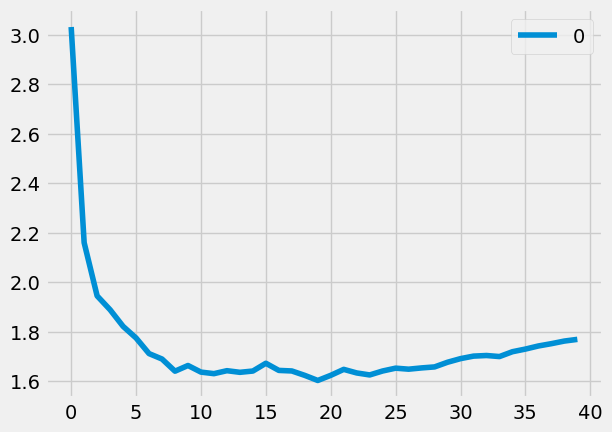

In [28]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [31]:
params = {'n_neighbors': np.arange(1,41),
               'metric': ['euclidean', 'manhattan']}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train, y_train)

print(model.best_score_)
print(model.best_params_)

0.10983005245521227
{'metric': 'manhattan', 'n_neighbors': 9}


In [32]:
model = model.best_estimator_
pred = model.predict(x_test) #make prediction on test set
score = model.score(x_test, y_test)

In [33]:
print(score)
print(sqrt(mean_squared_error(y_test, pred)))

0.19589294752693442
1.7560521449554023


#### Avec Scaling

In [35]:
# Scale the x_train set with method : StandardScaler, MinMaxScaler, RobustScaler
# using '.fit_transform' on it, then '.transform' on x_test
#
mms = MinMaxScaler()
rs = RobustScaler()
sc = StandardScaler()

keep_cols = ['hdlngth', 'skullw', 'totlngth', 'eye', 'chest', 'belly']

# Application of a MinMaxScaler
# x_train = mms.fit_transform(x_train[keep_cols])
# x_train = pd.DataFrame(x_train_scl, columns=keep_cols)

# x_test_scl = mms.transform(x_test[keep_cols])
# x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)


# Application of a RobustScaler
# x_train_scl = rs.fit_transform(x_train[keep_cols])
# x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

# x_test_scl = rs.transform(x_test[keep_cols])
# x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)


# Application of a StandardScaler
x_train_scl = sc.fit_transform(x_train[keep_cols])
x_train_scl = pd.DataFrame(x_train_scl, columns=keep_cols)

x_test_scl = sc.transform(x_test[keep_cols])
x_test_scl = pd.DataFrame(x_test_scl, columns=keep_cols)

In [36]:
# Error rate depending the K

rmse_val = [] #to store rmse values for different k
for k in range(40):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train_scl, y_train)  #fit the model
    pred = model.predict(x_test_scl) #make prediction on test set

    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , k , 'is:', error)

RMSE value for k=  1 is: 2.404423007708918
RMSE value for k=  2 is: 2.023301757029831
RMSE value for k=  3 is: 1.8503002759312097
RMSE value for k=  4 is: 1.8915932438026946
RMSE value for k=  5 is: 1.8560711193270587
RMSE value for k=  6 is: 1.733052861923785
RMSE value for k=  7 is: 1.6292135325652919
RMSE value for k=  8 is: 1.5508943992096949
RMSE value for k=  9 is: 1.5812608268306452
RMSE value for k=  10 is: 1.5846923991740478
RMSE value for k=  11 is: 1.600700389060111
RMSE value for k=  12 is: 1.6085573030583096
RMSE value for k=  13 is: 1.6188721510422366
RMSE value for k=  14 is: 1.6215131349880505
RMSE value for k=  15 is: 1.612623810922918
RMSE value for k=  16 is: 1.6161492742202064
RMSE value for k=  17 is: 1.6111500545479605
RMSE value for k=  18 is: 1.619530205466929
RMSE value for k=  19 is: 1.6155837345442978
RMSE value for k=  20 is: 1.6263455967290594
RMSE value for k=  21 is: 1.6313868034572092
RMSE value for k=  22 is: 1.6351794957958208
RMSE value for k=  23 is:

<AxesSubplot:>

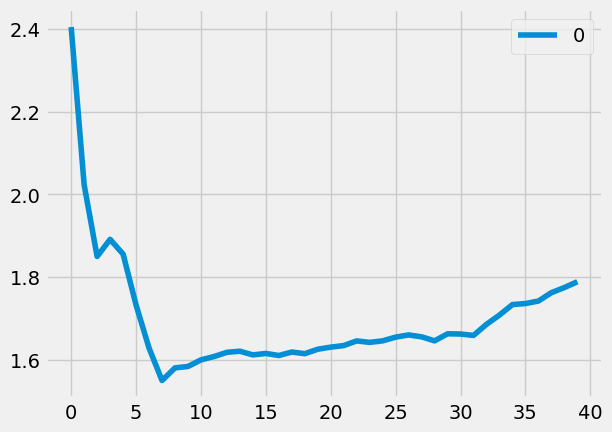

In [37]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [38]:
params = {'n_neighbors': np.arange(1,41),
               'metric': ['euclidean', 'manhattan']}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train_scl, y_train)

print(model.best_score_)
print(model.best_params_)

0.1479685250140204
{'metric': 'manhattan', 'n_neighbors': 7}


In [39]:
model = model.best_estimator_
pred = model.predict(x_test_scl) #make prediction on test set
score = model.score(x_test_scl, y_test)

In [41]:
print(score)
print(sqrt(mean_squared_error(y_test, pred)))

0.14904143475572051
1.8064863290772109


------------------------
# Major Conclusion about ML

*Les meilleures paramètres pour notre dataset :*
- Train_set : 0.7, random_state=42  
- Modèle : KNN Regressor : N = 7, Manhattan  
- Standard Scaler 

#### End ML

____________________________________
____________________________________

<H2><center>Saving the Model and Params (Label Encoder and Scaler)</center></H2>

In [42]:
# Using Pickle (for OOP) or Joblib (Numpy Array / Big Data)
# Create a file to save it -
param_ml = {
              "Scaler": sc,
              "Model": model
            }
# Use .dump() to save
#
joblib.dump(param_ml, 'model/opossum_joblib')

['opossum_joblib']

____________________________________
____________________________________

<H1><center>The End</center></H1>

</br>  
<p style='text-align: right;'><i>+-+-+-+-+ Template by : Charley Lebarbier +-+-+-+-+</i></p>
